# Laboratorio 8: Listas enlazadas, árboles mutables

**Instrucciones**

Responda las siguientes preguntas según el enunciado de cada una.

Al terminar guarde su archivo con los apellidos de cada uno en el grupo separados por el símbolo _ por ejemplo: apellido1_apellido2.jpynb.

El laboratorio se calificará al final de la clase. 


Usted puede trabajar en parejas, la copia será tratada de acuerdo al reglamento estudiantil.

#listas Enlazadas

Para las siguientes preguntas ud necesita entender la clase Link a continuación


```
class Link:
    """A linked list.

    >>> s = Link(1)
    >>> s.first
    1
    >>> s.rest is Link.empty
    True
    >>> s = Link(2, Link(3, Link(4)))
    >>> s.first = 5
    >>> s.rest.first = 6
    >>> s.rest.rest = Link.empty
    >>> s                                    # Displays the contents of repr(s)
    Link(5, Link(6))
    >>> s.rest = Link(7, Link(Link(8, Link(9))))
    >>> s
    Link(5, Link(7, Link(Link(8, Link(9)))))
    >>> print(s)                             # Prints str(s)
    <5 7 <8 9>>
    """
    empty = ()

    def __init__(self, first, rest=empty):
        assert rest is Link.empty or isinstance(rest, Link)
        self.first = first
        self.rest = rest

    def __repr__(self):
        if self.rest is not Link.empty:
            rest_repr = ', ' + repr(self.rest)
        else:
            rest_repr = ''
        return 'Link(' + repr(self.first) + rest_repr + ')'

    def __str__(self):
        string = '<'
        while self.rest is not Link.empty:
            string += str(self.first) + ' '
            self = self.rest
        return string + str(self.first) + '>'
```



In [2]:
#@title Clase Link
class Link:
    """A linked list.

    >>> s = Link(1)
    >>> s.first
    1
    >>> s.rest is Link.empty
    True
    >>> s = Link(2, Link(3, Link(4)))
    >>> s.first = 5
    >>> s.rest.first = 6
    >>> s.rest.rest = Link.empty
    >>> s                                    # Displays the contents of repr(s)
    Link(5, Link(6))
    >>> s.rest = Link(7, Link(Link(8, Link(9))))
    >>> s
    Link(5, Link(7, Link(Link(8, Link(9)))))
    >>> print(s)                             # Prints str(s)
    <5 7 <8 9>>
    """
    empty = ()

    def __init__(self, first, rest=empty):
        assert rest is Link.empty or isinstance(rest, Link)
        self.first = first
        self.rest = rest

    def __repr__(self):
        if self.rest is not Link.empty:
            rest_repr = ', ' + repr(self.rest)
        else:
            rest_repr = ''
        return 'Link(' + repr(self.first) + rest_repr + ')'

    def __str__(self):
        string = '<'
        while self.rest is not Link.empty:
            string += str(self.first) + ' '
            self = self.rest
        return string + str(self.first) + '>'


**Pregunta 1:**  Para las siguientes preguntas escriba Función si cree que la respuesta es <función...>, Error si falla y Nada si no se muestra nada.



```
>>> link = Link(1000)
>>> link.first
1000  # Link solo tiene un elemento
>>> link.rest is Link.empty
True #El resto del elemento de link está vacío.

>>> link = Link(1000, 2000)
Error # Porque no encadena nada
>>> link = Link(1000, Link())

Error porque Link no puede estar vacío





```
>>> link = Link(1, Link(2, Link(3)))
>>> link.first
1

>>> link.rest.first
2

>>> link.rest.rest.rest is Link.empty
True

>>> link.first = 9001
>>> }link.first
9001

>>> link.rest = link.rest.rest
>>> link.rest.first
3

>>> link = Link(1)
>>> link.rest = link
>>> link.rest.rest.rest.rest.first
1

>>> link = Link(2, Link(3, Link(4)))
>>> link2 = Link(1, link)
>>> link2.first
1

>>> link2.rest.first
2
```





```
>>> link = Link(5, Link(6, Link(7)))
>>> link                  # Look at the __repr__ method of Link
Link(5, Link(6, Link(7)))

>>> print(link) # Look at the __str__ method of Link
<5 6 7>

```



**Pregunta 2:** Convertir enlace

Escriba una función convert_link que tome una lista enlazada y devuelva la secuencia como una lista de Python. Puede suponer que la lista de entrada es superficial; que ninguno de los elementos es otra lista enlazada.

¡Intente encontrar una solución tanto iterativa como recursiva para este problema!

In [3]:
link = Link(5, Link(6, Link(7)))
print(link)

<5 6 7>


In [48]:
def convert_link(link):
    """Takes a linked list and returns a Python list with the same elements.

    >>> link = Link(1, Link(2, Link(3, Link(4))))
    >>> convert_link(link)
    [1, 2, 3, 4]
    >>> convert_link(Link.empty)
    []
    """
    if link.rest is not Link.empty:
        return [link.first] + convert_link(link.rest)
    else:
        return [link.first]

160000

# Árboles

Para las siguientes preguntas ud necesita entender la clase Tree a continuación



```
class Tree:
    """
    >>> t = Tree(3, [Tree(2, [Tree(5)]), Tree(4)])
    >>> t.label
    3
    >>> t.branches[0].label
    2
    >>> t.branches[1].is_leaf()
    True
    """

    def __init__(self, label, branches=[]):
        for b in branches:
            assert isinstance(b, Tree)
        self.label = label
        self.branches = list(branches)

    def is_leaf(self):
        return not self.branches

    def __repr__(self):
        if self.branches:
            branch_str = ', ' + repr(self.branches)
        else:
            branch_str = ''
        return 'Tree({0}{1})'.format(self.label, branch_str)

    def __str__(self):
        def print_tree(t, indent=0):
            tree_str = '  ' * indent + str(t.label) + "\n"
            for b in t.branches:
                tree_str += print_tree(b, indent + 1)
            return tree_str
        return print_tree(self).rstrip()
```



In [55]:
class Tree:
    def __init__(self, label, branches=[]):
        for b in branches:
            assert isinstance(b, Tree)
        self.label = label
        self.branches = list(branches)

    def is_leaf(self):
        return not self.branches

    def __repr__(self):
        if self.branches:
            branch_str = ', ' + repr(self.branches)
        else:
            branch_str = ''
        return 'Tree({0}{1})'.format(self.label, branch_str)

    def __str__(self):
        def print_tree(t, indent=0):
            tree_str = '  ' * indent + str(t.label) + "\n"
            for b in t.branches:
                tree_str += print_tree(b, indent + 1)
            return tree_str
        return print_tree(self).rstrip()

**Pregunta 3:**  Para las siguientes preguntas escriba Función si cree que la respuesta es <función...>, Error si falla y Nada si no se muestra nada.



```
>>> t = Tree(1, Tree(2))
Erorr el objeto no es iterable

>>> t = Tree(1, [Tree(2)])
>>> t.label
1
>>> t.branches[0]
Tree

>>> t.branches[0].label
2

>>> t.label = t.branches[0].label
>>> t
Tree(2, Tree(2))

>>> t.branches.append(Tree(4, [Tree(8)]))
>>> len(t.branches)
2
>>> t.branches[0]
Tree(2)

>>> t.branches[1]
Tree(4, [Tree(8)]))
```



**Pregunta 4**: Cuadrado

Escriba una función label_squarer que mute un árbol con etiquetas numéricas para que cada etiqueta se eleve al cuadrado.

In [68]:
def label_squarer(t):
    """Mutates a Tree t by squaring all its elements.

    >>> t = Tree(1, [Tree(3, [Tree(5)]), Tree(7)])
    >>> label_squarer(t)
    >>> t
    Tree(1, [Tree(9, [Tree(25)]), Tree(49)])
    """
    t.label = t.label ** 2
    for b in t.branches:
        label_squarer(b)
        
t = Tree(1, [Tree(3, [Tree(5)]), Tree(7)])
label_squarer(t)
t

Tree(1, [Tree(9, [Tree(25)]), Tree(49)])

**Pregunta 5:** Múltiple acumulativo

Escriba una función acumulativa_mul que mute el Árbol t de modo que la etiqueta de cada nodo se convierta en el producto de su etiqueta y todas las etiquetas en los subárboles con raíz en el nodo.



In [73]:
def cumulative_mul(t):
    """Mutates t so that each node's label becomes the product of all labels in
    the corresponding subtree rooted at t.

    >>> t = Tree(1, [Tree(3, [Tree(5)]), Tree(7)])
    >>> cumulative_mul(t)
    >>> t
    Tree(105, [Tree(15, [Tree(5)]), Tree(7)])
    """
    for b in t.branches:
        cumulative_mul(b)
        t.label *= b.label
        
        
t = Tree(1, [Tree(3, [Tree(5)]), Tree(7)])
cumulative_mul(t)
t

Tree(105, [Tree(15, [Tree(5)]), Tree(7)])

**Pregunta 6:** Agregar hojas

Implemente add_d_leaves, una función que toma una instancia de Tree t y un número v.

Definimos la profundidad de un nodo en t como el número de aristas desde la raíz hasta ese nodo. Por lo tanto, la profundidad de la raíz es 0.

Para cada nodo en el árbol, debe agregarle d hojas, donde d es la profundidad del nodo. Cada hoja agregada debe tener una etiqueta de v. Si el nodo en esta profundidad tiene ramas existentes, debe agregar estas hojas al final de esa lista de ramas.

Por ejemplo, debe agregar 1 hoja con la etiqueta v a cada nodo en la profundidad 1, 2 hojas a cada nodo en la profundidad 2, y así sucesivamente.

Aquí hay un ejemplo de un árbol t (que se muestra a la izquierda) y el resultado después de aplicar add_d_leaves con v como 5.

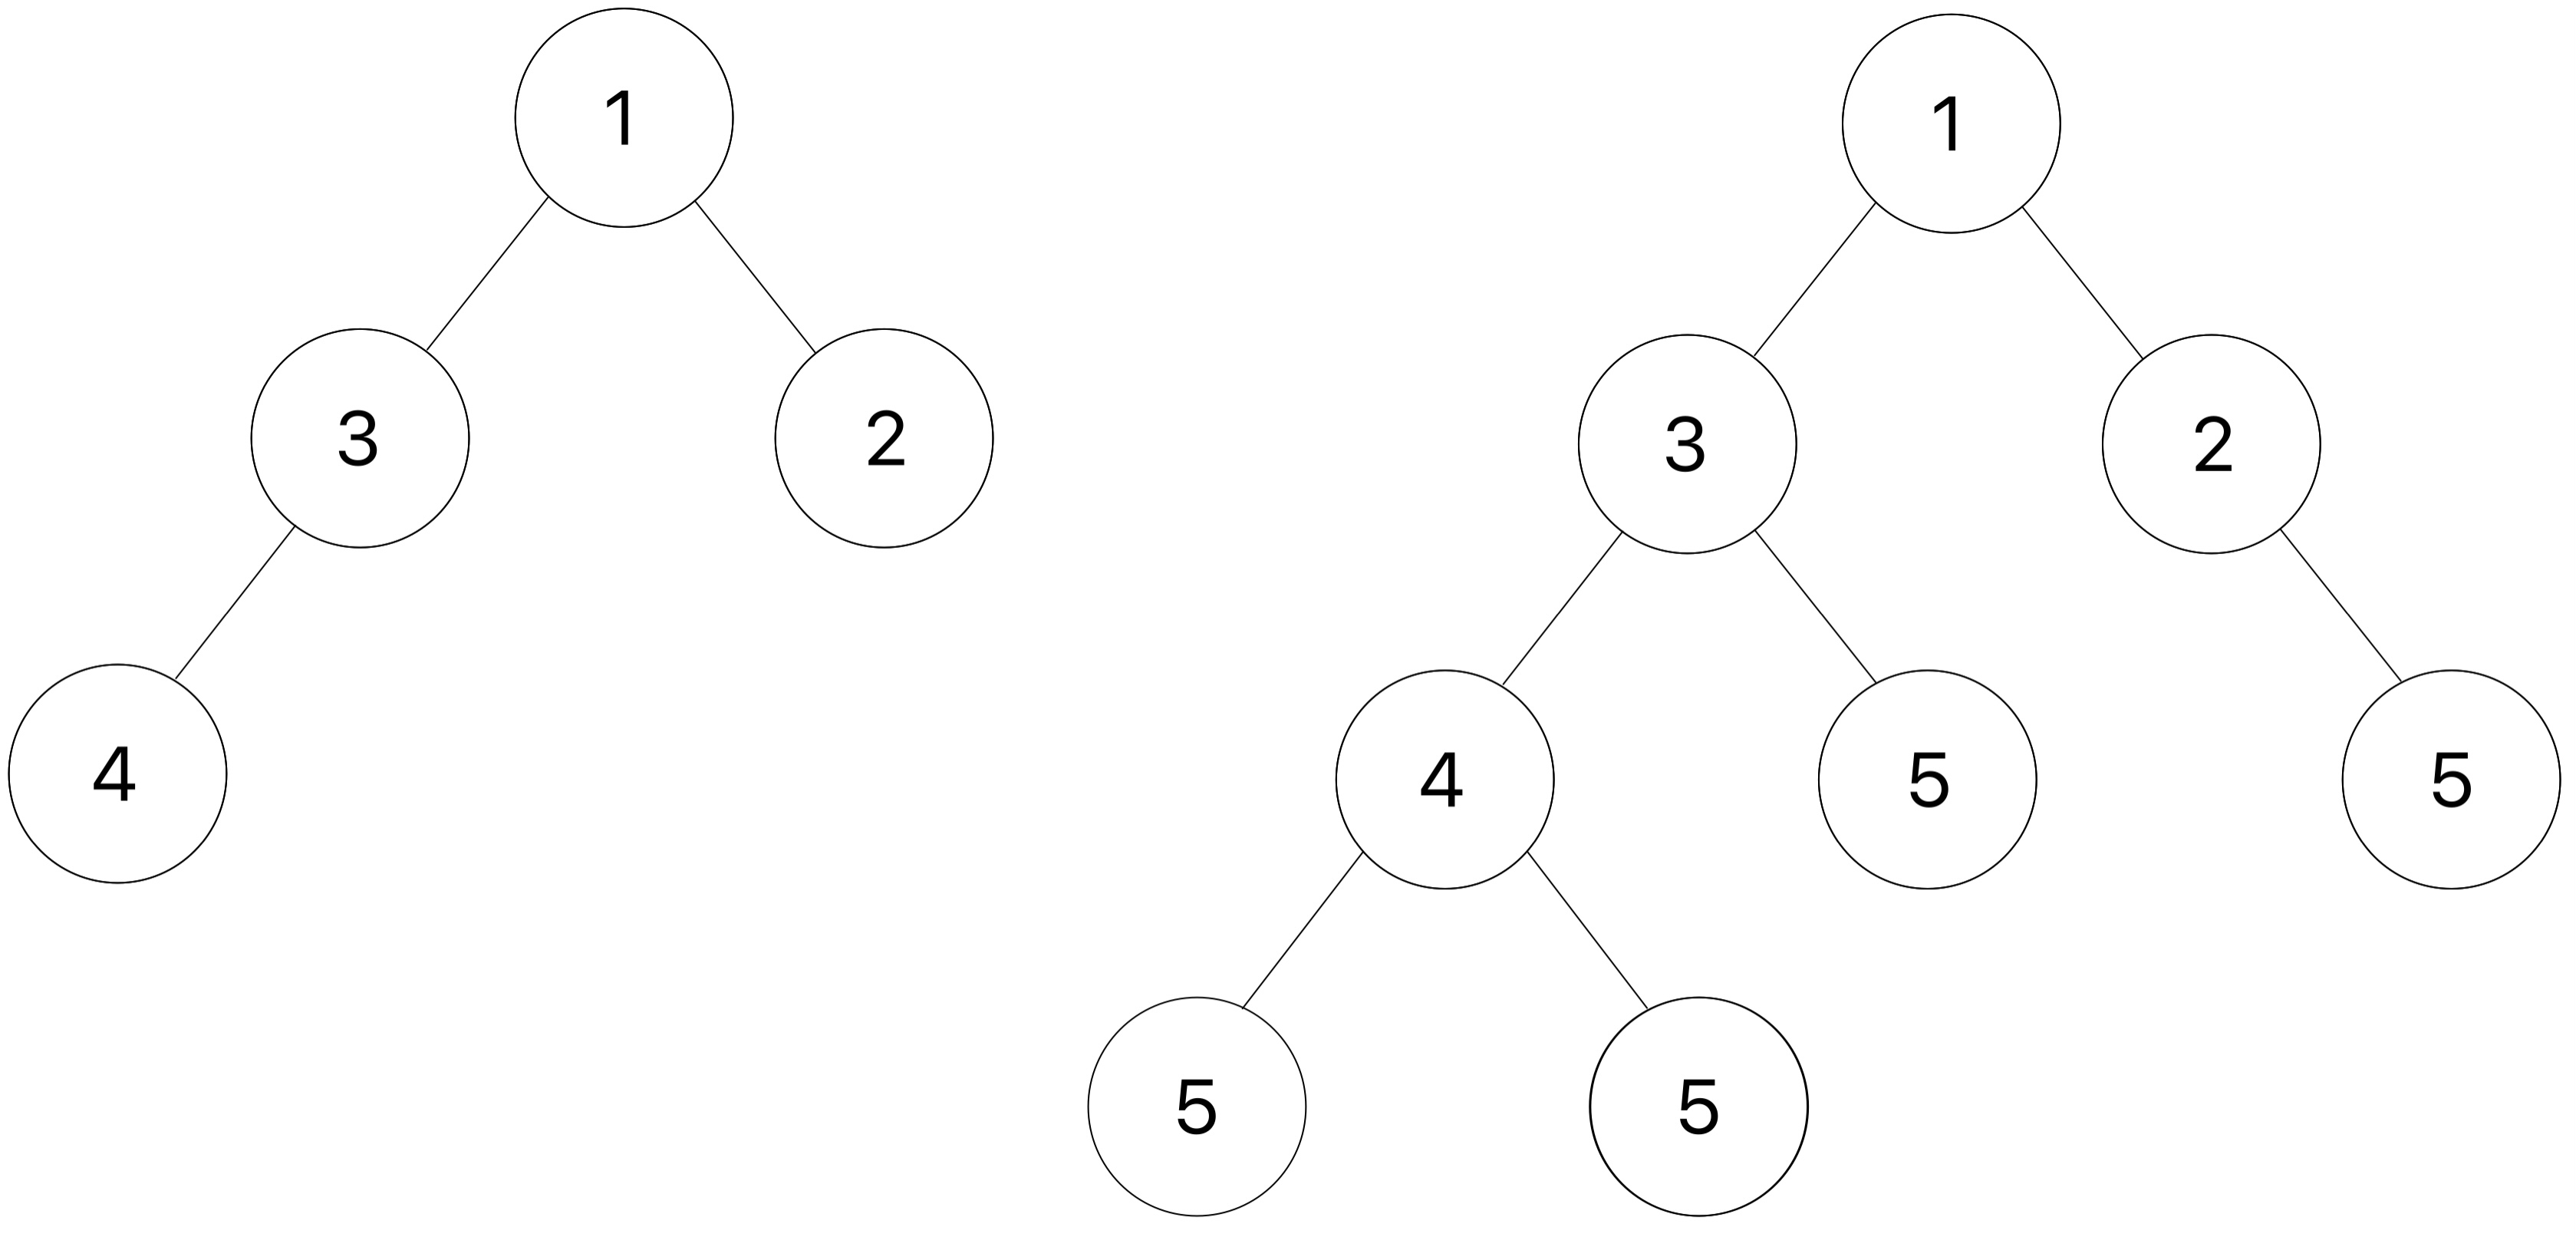

In [87]:
def add_d_leaves(t, v):
    """Add d leaves containing v to each node at every depth d.

    >>> t_one_to_four = Tree(1, [Tree(2), Tree(3, [Tree(4)])])
    >>> print(t_one_to_four)
    1
      2
      3
        4
    >>> add_d_leaves(t_one_to_four, 5)
    >>> print(t_one_to_four)
    1
      2
        5
      3
        4
          5
          5
        5

    >>> t1 = Tree(1, [Tree(3)])
    >>> add_d_leaves(t1, 4)
    >>> t1
    Tree(1, [Tree(3, [Tree(4)])])
    >>> t2 = Tree(2, [Tree(5), Tree(6)])
    >>> t3 = Tree(3, [t1, Tree(0), t2])
    >>> print(t3)
    3
      1
        3
          4
      0
      2
        5
        6
    >>> add_d_leaves(t3, 10)
    >>> print(t3)
    3
      1
        3
          4
            10
            10
            10
          10
          10
        10
      0
        10
      2
        5
          10
          10
        6
          10
          10
        10
    """
    def add_leaves(t,s,v):
        if t.branches == []:
            for b in range(s): t.branches.append(Tree(v))
            return
        for branch in t.branches: add_leaves(branch, s+1, v)
        for chain in range(s): t.branches.append(Tree(v))    
    add_leaves(t,0,v)

In [88]:
>>> t1 = Tree(1, [Tree(3)])
>>> add_d_leaves(t1, 4)
>>> t1
Tree(1, [Tree(3, [Tree(4)])])
>>> t2 = Tree(2, [Tree(5), Tree(6)])
>>> t3 = Tree(3, [t1, Tree(0), t2])
>>> print(t3)

3
  1
    3
      4
  0
  2
    5
    6
